## Visualize snapshots and cell division.

### Milky Way type halo.

In [5]:
from shared.preface import *
import shared.functions as fct

# ----------------------- #
# Isolate a MW-type halo. #
# ----------------------- #

# Halo batch parameters.
sim = 'L012N376'
snap = '0036'  # "starting" snapshot to search for halos
mass_gauge = 12.1  # in log10 Msun
mass_range = 0.1
batch_size = 10

hname = f'1e+{mass_gauge}_pm{mass_range}Msun'
fct.halo_batch_indices(
    sim, snap, mass_gauge, mass_range, 'halos', batch_size, hname
)
halo_batch_IDs = np.load(f'{sim}/halo_batch_{hname}_indices.npy')
halo_batch_params = np.load(f'{sim}/halo_batch_{hname}_params.npy')
halo_num = len(halo_batch_params)

print('***********************************')
print('Halo batch params (Rvir,Mvir,cNFW):')
print(halo_batch_params)
print(f'Choose 12.1 Mvir halo: ID={halo_batch_IDs[1]}')
print('***********************************')

# Gravitationally bound DM to this halo.
halo_ID = 4
fname = f'gravBound_DM'
# fct.read_DM_halo_index(sim, snap, halo_ID, fname)
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')
print('DM grav. bound to halo:', len(DM_raw))

***********************************
Halo batch params (Rvir,Mvir,cNFW):
[[233.38982753  12.13262326  10.84972137]
 [214.21391326  12.02092052   5.10431355]]
Choose 12.1 Mvir halo: ID=4
***********************************
DM grav. bound to halo: 741346


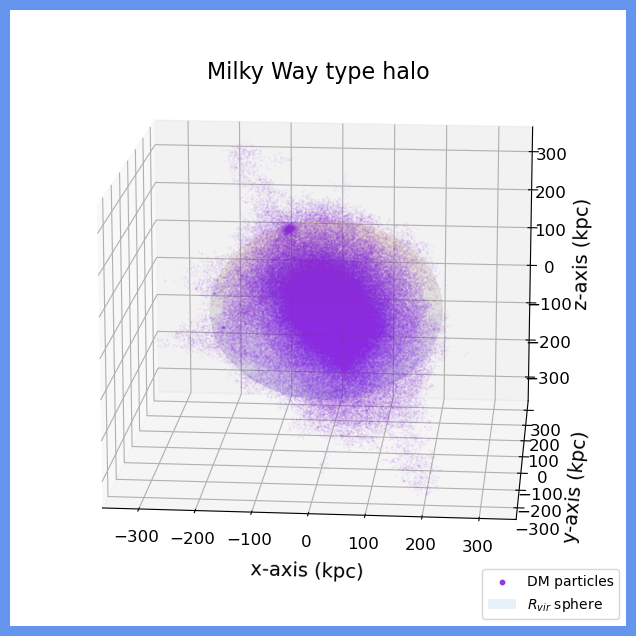

In [13]:
from shared.preface import *
import shared.functions as fct

# Load DM.
fname = f'gravBound_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Visualize grav. bound DM halo (with virial radius sphere).
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')
# ax.patch.set_facecolor('cornflowerblue')
bubble_cmap = cc.cm.CET_D7  # blue-to-yellow, medium dark middle

x_DM, y_DM, z_DM = DM_raw[:,0], DM_raw[:,1], DM_raw[:,2]
cut = 2
x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
ax.scatter(x, y, z, alpha=0.9, c='blueviolet', s=0.001, label='DM particles')

rGC = halo_batch_params[1,0]
uGC, vGC = np.mgrid[0:2 * np.pi:200j, 0:np.pi:100j]
xGC = rGC * np.cos(uGC) * np.sin(vGC)
yGC = rGC * np.sin(uGC) * np.sin(vGC)
zGC = rGC * np.cos(vGC)
surf = ax.plot_surface(
    xGC, yGC, zGC, alpha=0.1, cmap=bubble_cmap,
    rstride=1, cstride=1, label=r'$R_{vir}$ sphere'
)
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

ax.set_title('Milky Way type halo', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
ax_lim = 350
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend
plt.savefig(
    'figures/Presi_MWtype_halo.pdf', 
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
)
plt.show()

### Same MW-type halo and most massive sarrounding (sub)halos.

In [7]:
from shared.preface import *
import shared.functions as fct

# Halo parameters.
sim = 'L012N376'
snap = '0036'
halo_ID = 4
DM_range_kpc = 500*kpc
halo_inRange_limit = 10

# Get rvir.
mass_gauge = 12.1  # in log10 Msun
mass_range = 0.1
hname = f'1e+{mass_gauge}_pm{mass_range}Msun'
halo_batch_params = np.load(f'{sim}/halo_batch_{hname}_params.npy')

fname = f'sarrounding_halos_DM'
fct.read_DM_halos_inRange(
    sim, snap, halo_ID, DM_range_kpc, halo_inRange_limit, fname
)
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')
print('DM grav. bound to halos in range:', len(DM_raw))

All halos in range: 599
DM grav. bound to halos in range: 766530


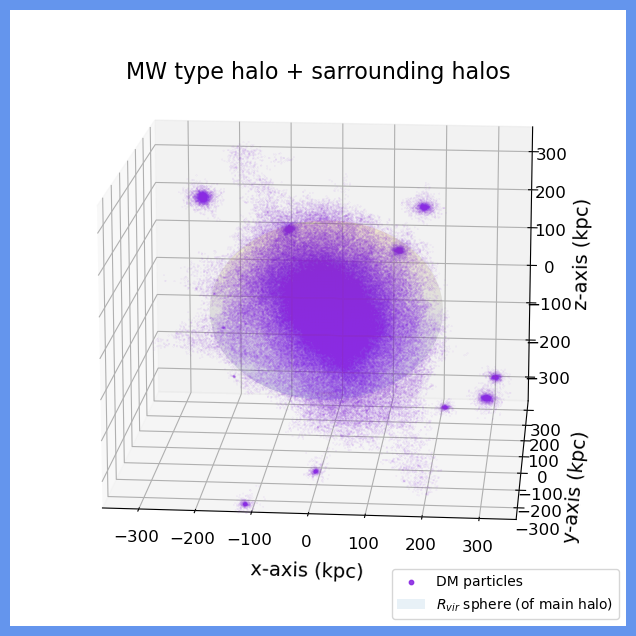

In [12]:
# Visualize sarrounding halos.
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')
bubble_cmap = cc.cm.CET_D7  # blue-to-yellow, medium dark middle

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

x_DM, y_DM, z_DM = DM_raw[:,0], DM_raw[:,1], DM_raw[:,2]
cut = 2
x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
ax.scatter(x, y, z, alpha=0.9, c='blueviolet', s=0.001, label='DM particles')

rGC = halo_batch_params[1,0]
uGC, vGC = np.mgrid[0:2 * np.pi:200j, 0:np.pi:100j]
xGC = rGC * np.cos(uGC) * np.sin(vGC)
yGC = rGC * np.sin(uGC) * np.sin(vGC)
zGC = rGC * np.cos(vGC)
surf = ax.plot_surface(
    xGC, yGC, zGC, alpha=0.1, cmap=bubble_cmap,
    rstride=1, cstride=1, label=r'$R_{vir}$ sphere (of main halo)'
)
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

ax.set_title('MW type halo + sarrounding halos', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
ax_lim = 350
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend
plt.savefig(
    'figures/Presi_sarrounding_halos.pdf', 
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
)
plt.show()

### Cell gravity grid: Initial.

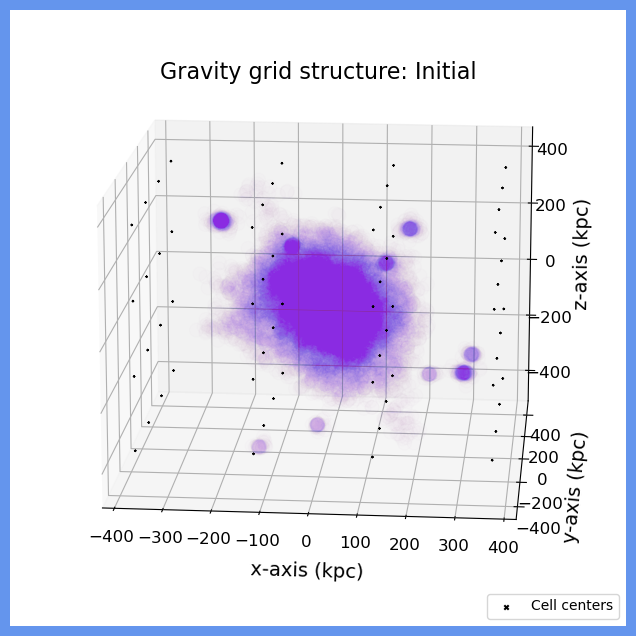

In [9]:
from shared.preface import *
import shared.functions as fct

# ---------------------- #
# Cell division process. #
# ---------------------- #
DM_lim_visual = 1000000

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Initialize grid.
snap_GRID_L = (int(np.abs(DM_raw).max()) + 1)*kpc
raw_grid = fct.grid_3D(snap_GRID_L, snap_GRID_L/2)
init_grid = np.expand_dims(raw_grid, axis=1)

# Prepare arrays for cell division.
DM_raw *= kpc
DM_pos = np.expand_dims(DM_raw, axis=0)
DM_pos_for_cell_division = np.repeat(DM_pos, len(init_grid), axis=0)

# Cell division.
cell_division_count = fct.cell_division(
    init_grid, DM_pos_for_cell_division, snap_GRID_L, DM_lim_visual, None, 
    sim, fname
)

# Load files from cell division.
fin_grid = np.load(f'{sim}/fin_grid_{fname}.npy')
DM_count = np.load(f'{sim}/DM_count_{fname}.npy')
cell_com = np.load(f'{sim}/cell_com_{fname}.npy')
cell_gen = np.load(f'{sim}/cell_gen_{fname}.npy')

# Plot grid over DM.
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')

# Break up total DM array into all halos, and plot individually.
DM_raw /= kpc
DM_lengths = np.load(f'{sim}/DM_lengths_{fname}.npy')

for i, DM_length in enumerate(DM_lengths):

    start = int(np.sum(DM_lengths[:i]))
    stop = int(np.sum(DM_lengths[:i+1]))
    # print(start, stop)
    DM_halo = DM_raw[start:stop]

    x_DM, y_DM, z_DM = DM_halo[:,0], DM_halo[:,1], DM_halo[:,2]
    cut = 30
    x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
    ax.scatter(
        x, y, z, alpha=0.008, c='blueviolet', s=100
    )

plot_grid = np.squeeze(fin_grid, axis=1) / kpc
xg, yg, zg = plot_grid[:,0], plot_grid[:,1], plot_grid[:,2] 
ax.scatter(
    xg, yg, zg, s=1, marker='x', color='black', 
    alpha=1, label='Cell centers'
)

ax.set_title('Gravity grid structure: Initial', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
# ax_lim = 300
# ax.set_xlim(-ax_lim, ax_lim)
# ax.set_ylim(-ax_lim, ax_lim)
# ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend

plt.savefig(
    'figures/Presi_cell_grid_initial.pdf',
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
)
plt.show()

In [10]:
from shared.preface import *
import shared.functions as fct

# ---------------------- #
# Cell division process. #
# ---------------------- #
DM_lim_visual = 1000

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Initialize grid.
snap_GRID_L = (int(np.abs(DM_raw).max()) + 1)*kpc
raw_grid = fct.grid_3D(snap_GRID_L, snap_GRID_L)
init_grid = np.expand_dims(raw_grid, axis=1)

# Prepare arrays for cell division.
DM_raw *= kpc
DM_pos = np.expand_dims(DM_raw, axis=0)
DM_pos_for_cell_division = np.repeat(DM_pos, len(init_grid), axis=0)

# Cell division.
cell_division_count = fct.cell_division(
    init_grid, DM_pos_for_cell_division, snap_GRID_L, DM_lim_visual, None, 
    sim, fname
)

# Load files from cell division.
fin_grid = np.load(f'{sim}/fin_grid_{fname}.npy')
DM_count = np.load(f'{sim}/DM_count_{fname}.npy')
cell_com = np.load(f'{sim}/cell_com_{fname}.npy')
cell_gen = np.load(f'{sim}/cell_gen_{fname}.npy')

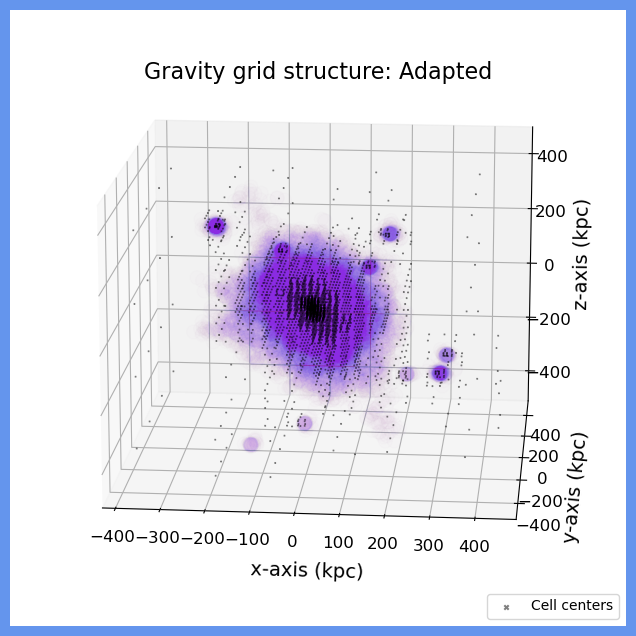

In [11]:
# Plot grid over DM.
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')

# Load DM.
fname = f'sarrounding_halos_DM'
DM_raw = np.load(f'{sim}/DM_pos_{fname}.npy')

# Break up total DM array into all halos, and plot individually.
DM_lengths = np.load(f'{sim}/DM_lengths_{fname}.npy')

for i, DM_length in enumerate(DM_lengths):

    start = int(np.sum(DM_lengths[:i]))
    stop = int(np.sum(DM_lengths[:i+1]))
    # print(start, stop)
    DM_halo = DM_raw[start:stop]

    x_DM, y_DM, z_DM = DM_halo[:,0], DM_halo[:,1], DM_halo[:,2]
    cut = 30
    x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
    ax.scatter(
        x, y, z, alpha=0.008, c='blueviolet', s=100
    )

plot_grid = np.squeeze(fin_grid, axis=1) / kpc
xg, yg, zg = plot_grid[:,0], plot_grid[:,1], plot_grid[:,2] 
ax.scatter(
    xg, yg, zg, s=0.2, marker='x', color='black', 
    alpha=0.5, label='Cell centers'
)

ax.set_title('Gravity grid structure: Adapted', y=1.0, pad=-14)
ax.set_xlabel('\n x-axis (kpc)')
ax.set_ylabel('\n y-axis (kpc)')
ax.set_zlabel('\n z-axis (kpc)')
# ax_lim = 300
# ax.set_xlim(-ax_lim, ax_lim)
# ax.set_ylim(-ax_lim, ax_lim)
# ax.set_zlim(-ax_lim, ax_lim)
ax.view_init(elev=15, azim=-85)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [10]  # Increase DM dot in legend

plt.savefig(
    'figures/Presi_cell_grid_adapted.pdf',
    facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight'
)
plt.show()